# Preparatory code

## Imports

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

## Support functions

In [5]:
def show(*images):
    for i in images:
        image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()

# Data

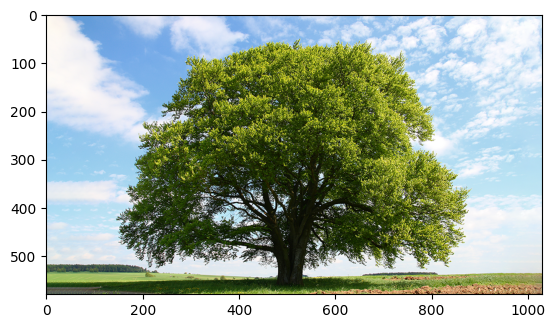

In [19]:
img = cv2.imread('../Computer Vision/Class practice/samples/tree.png')
show(img)

NumPy does not support 3D data, so we have to flatten the image.

In [18]:
h, w, c = img.shape
img2D = img.reshape((h*w, c))

# Model

In [21]:
model = KMeans(n_clusters = 7)

# Training

Let's map colours to the clusters.

In [29]:
cluster_labels = model.fit_predict(img2D)
cluster_labels

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

The centroids may contain floats, but RGB is only described by integers.

In [28]:
bgr_cols = model.cluster_centers_.round(0).astype(int)
bgr_cols

array([[  7,  37,  24],
       [245, 235, 223],
       [ 38, 142, 130],
       [234, 198, 156],
       [ 89, 195, 191],
       [ 25,  84,  67],
       [112, 128, 119]])

Let's get back to a 3D image:

In [24]:
img_quant = np.reshape(bgr_cols[cluster_labels], (h, w, c))     #note the compact numpy syntax
img_quant = img_quant.astype('uint8')

# Results

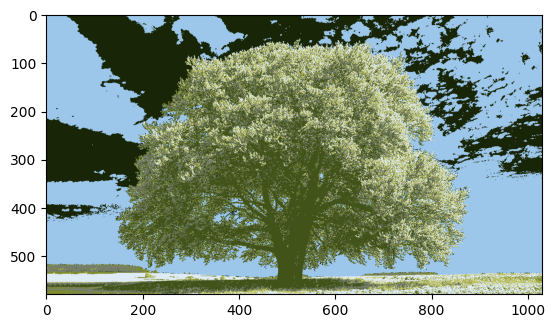

In [25]:
show(img_quant)